# 내가 탑승하는 titanic

## 모델 import, 데이터 불러오기, 앤 보기



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = '/content/drive/MyDrive/kaagle/타이타닉/train.csv'
test = '/content/drive/MyDrive/kaagle/타이타닉/test.csv'

# train = 'train.csv'
# test = 'test.csv'

#pandas read_csv로 불러오기
train = pd.read_csv(train)
test = pd.read_csv(test)
print(train.head())
test.head()

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


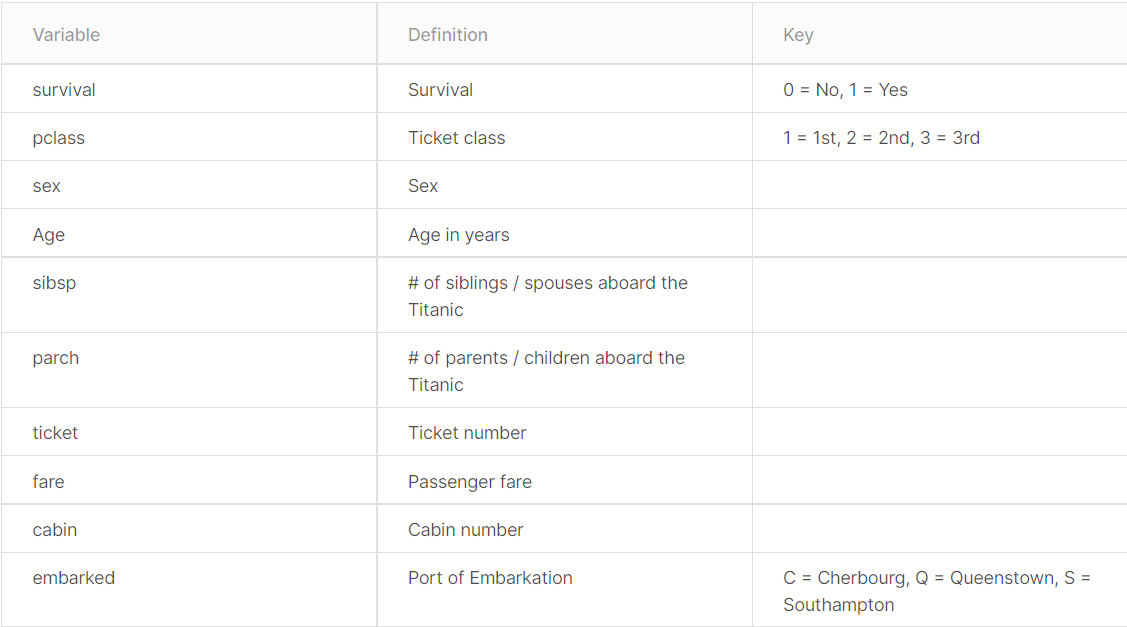

## EDA

In [4]:
train.head()
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.Age.value_counts()
train.SibSp.value_counts()
train.Parch.value_counts()
train.Ticket.value_counts()
train.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

### 시각화해서 보기!

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

#### 파이 차트!

1. 무엇을 볼 것인가?  성별의 비율? 앤 생존비율 / 클래스별 비율 앤 생존비율 / 지역별 비율 앤 생존 비율
2. 일단 전체 feature의 비율에서 각 항목을 분리 비교
3. 각 항목에 대한 생존 여부를 비교
 

In [7]:
def pie_chart(feature):
    feature_ratio = train[feature].value_counts(sort=False)
    feature_ratio_index = feature_ratio.index 
    feature_ratio_size = feature_ratio.size
    survived = train[train['Survived'] ==1][feature].value_counts()
    dead = train[train["Survived"] == 0][feature].value_counts()

    plt.plot(aspect ='auto')
    plt.title(feature+'\'s ratil in total')
    plt.pie(feature_ratio, labels=feature_ratio_index, autopct='%.1f%%')
    plt.show()

    for i, index in enumerate(feature_ratio_index):
        plt.subplot(1, feature_ratio_size+1, i+1, aspect = 'equal')
        plt.pie([survived[index],dead[index]], labels=['survived', 'dead'], autopct="%.1f%%")
        plt.title(str(index) + '\'s ratio')
    
    plt.show()

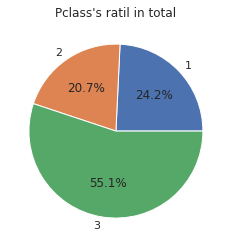

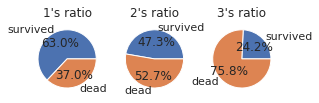

In [8]:
pie_chart('Pclass')

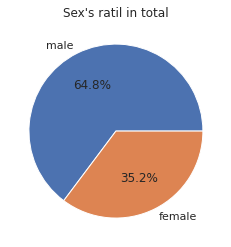

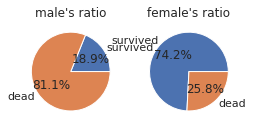

In [9]:
pie_chart('Sex')

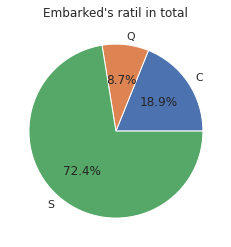

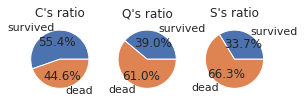

In [10]:
pie_chart('Embarked')

#### bar차트
1. sibsp과 parch만 할것/ 값들이 한 6~7개임
2. 각 값들의 생존과 죽음 여부를 볼 것임

In [11]:
def bar_chart(feature):
    feature_info = train[feature].value_counts()
    feature_size = feature_info.size
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train["Survived"]==0][feature].value_counts()

    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True)

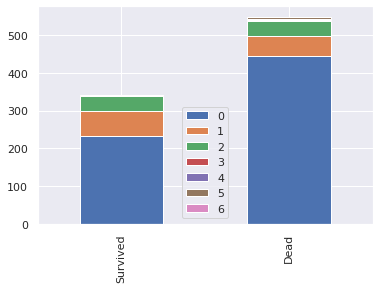

In [12]:
bar_chart('Parch')

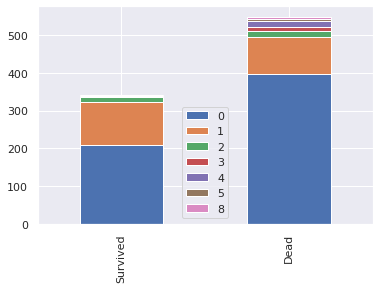

In [13]:
bar_chart('SibSp')

In [14]:
a = train.SibSp.value_counts()

type(train[train["Survived"]==0]['Parch'].value_counts())

pandas.core.series.Series

## 데이터셋, 결측치처리

In [15]:
train_and_test = [train, test]
type(train_and_test)

list

In [16]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [17]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [19]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Cabin drop 결측치가 많아 다 드랍

In [20]:
for dataset in train_and_test:
    dataset.drop('Cabin', axis=1, inplace=True)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [21]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


### Embarcked 결측치 처리

In [22]:
train.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [23]:
for dataset in train_and_test:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    dataset['Embarked'] = dataset['Embarked'].astype(str)

In [24]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

### Fare 결측치처리

In [25]:
test[test.Fare.isnull()== True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [26]:
train[train.Pclass ==3].Fare.mean()

13.675550101832997

In [27]:
for dataset in train_and_test:
    dataset['Fare'] = dataset['Fare'].fillna(13.675)

In [29]:
test.Fare.isnull().sum()

0

### Age column 결측치처리

In [31]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

In [32]:
a = train.Name.values
b = test.Name.values
train['title'] =''
test['title'] = ''
for i in range(len(a)):
    train['title'][i] = a[i].split(',')[1].split('.')[0].lower().strip()
for i in range(len(b)):
    test['title'][i] = b[i].split(',')[1].split('.')[0].lower().strip() 

train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,mr


In [33]:
train.title
test.title

0          mr
1         mrs
2          mr
3          mr
4         mrs
        ...  
413        mr
414      dona
415        mr
416        mr
417    master
Name: title, Length: 418, dtype: object

In [34]:
print('train의 결측치: \n',train[train['Age'].isnull() == True].title.value_counts())
print('test의 결측치: \n', test[test['Age'].isnull() == True].title.value_counts())

train의 결측치: 
 mr        119
miss       36
mrs        17
master      4
dr          1
Name: title, dtype: int64
test의 결측치: 
 mr        57
miss      14
mrs       10
master     4
ms         1
Name: title, dtype: int64


In [35]:
train.title.value_counts()

mr              517
miss            182
mrs             125
master           40
dr                7
rev               6
col               2
major             2
mlle              2
jonkheer          1
mme               1
sir               1
capt              1
the countess      1
don               1
lady              1
ms                1
Name: title, dtype: int64

### title을 먼저 정리를 해줘야 그것을 바탕으로 AGE의 결측치를 처리해줄 수 있음
밑에서 먼저 그 항목만 하고 올라오셈

In [43]:
print('train: \n', train.title.value_counts())
print('test: \n', test.title.value_counts())

train: 
 mr        517
miss      185
mrs       126
master     40
other      23
Name: title, dtype: int64
test: 
 mr        240
miss       79
mrs        72
master     21
other       6
Name: title, dtype: int64


In [44]:
print('train의 결측치: \n',train[train['Age'].isnull() == True].title.value_counts())
print('test의 결측치: \n', test[test['Age'].isnull() == True].title.value_counts())

train의 결측치: 
 mr        119
miss       36
mrs        17
master      4
other       1
Name: title, dtype: int64
test의 결측치: 
 mr        57
miss      15
mrs       10
master     4
Name: title, dtype: int64


In [45]:
mr_age_mean = round(train[train['title'] == 'mr'].Age.mean(), 2)
miss_age_mean = round(train[train['title'] == 'miss'].Age.mean(), 2)
mrs_age_mean = round(train[train['title'] == 'mrs'].Age.mean(), 2)
master_age_mean = round(train[train['title'] == 'master'].Age.mean(), 2)
other_age_mean = round(train[train['title'] == 'other'].Age.mean(), 2)

print('mr의 평균나이: ', mr_age_mean)
print('miss의 평균나이: ', miss_age_mean)
print('mrs의 평균나이: ', mrs_age_mean)
print('master의 평균나이: ', master_age_mean)
print('other의 평균나이: ', other_age_mean)

mr의 평균나이:  32.37
miss의 평균나이:  21.85
mrs의 평균나이:  35.79
master의 평균나이:  4.57
other의 평균나이:  45.55


#### title에 따른 Age 결측치 채우기! 연습....

In [ ]:
train1 = train.copy()
test1 = test.copy()
train_andand_test = [train1, test1]

In [ ]:
train1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,mr


In [ ]:
train1['Age'] = train1.Age.fillna('nan')
train1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
title          0
dtype: int64

In [ ]:
for dataset in train_andand_test:
    dataset.loc[(dataset['Age'] =='nan')&(dataset['title']=='mr'), 'Age'] = mr_age_mean
    dataset.loc[(dataset['Age'] =='nan')&(dataset['title']=='miss'), 'Age'] = miss_age_mean
    dataset.loc[(dataset['Age'] =='nan')&(dataset['title'] == 'mrs'), 'Age'] = mrs_age_mean
    dataset.loc[(dataset['Age'] =='nan')&(dataset['title'] == 'master'), 'Age'] = master_age_mean
    dataset.loc[(dataset['Age'] =='nan')&(dataset['title'] == 'dr'), 'Age'] = dr_age_mean

train1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,mrs
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S,rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S,miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.77,1,2,W./C. 6607,23.4500,S,miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C,mr


In [ ]:
train1.Age.isnull().sum()

0

### title 값으로 Age 결측치 채우기


In [46]:
for dataset in train_and_test:
    dataset.Age = dataset.Age.fillna('nan')

print(train.Age.isnull().sum())
test.Age.isnull().sum()

0


0

In [48]:
for dataset in train_and_test:
    dataset.loc[(dataset['Age'] =='nan')&(dataset['title']=='mr'), 'Age'] = mr_age_mean
    dataset.loc[(dataset['Age'] =='nan')&(dataset['title']=='miss'), 'Age'] = miss_age_mean
    dataset.loc[(dataset['Age'] =='nan')&(dataset['title'] == 'mrs'), 'Age'] = mrs_age_mean
    dataset.loc[(dataset['Age'] =='nan')&(dataset['title'] == 'master'), 'Age'] = master_age_mean
    dataset.loc[(dataset['Age'] =='nan')&(dataset['title'] == 'other'), 'Age'] = other_age_mean

train.Age.value_counts()

32.37    119
21.85     36
24.00     30
22.00     27
18.00     26
        ... 
70.50      1
0.42       1
66.00      1
53.00      1
20.50      1
Name: Age, Length: 93, dtype: int64

In [50]:
print('train.Age 값: \n', train.Age.unique())
print('test.Age 값: \n', test.Age.unique())

train.Age 값: 
 [22.0 38.0 26.0 35.0 32.37 54.0 2.0 27.0 14.0 4.0 58.0 20.0 39.0 55.0 31.0
 35.79 34.0 15.0 28.0 8.0 19.0 21.85 40.0 66.0 42.0 21.0 18.0 3.0 7.0 49.0
 29.0 65.0 28.5 5.0 11.0 45.0 4.57 17.0 32.0 16.0 25.0 0.83 30.0 33.0 23.0
 24.0 46.0 59.0 71.0 37.0 47.0 14.5 70.5 32.5 12.0 9.0 36.5 51.0 55.5 40.5
 44.0 1.0 61.0 56.0 50.0 36.0 45.5 20.5 62.0 41.0 52.0 63.0 23.5 0.92 43.0
 60.0 10.0 64.0 13.0 48.0 0.75 53.0 57.0 80.0 70.0 24.5 6.0 0.67 45.55
 30.5 0.42 34.5 74.0]
test.Age 값: 
 [34.5 47.0 62.0 27.0 22.0 14.0 30.0 26.0 18.0 21.0 32.37 46.0 23.0 63.0
 24.0 35.0 45.0 55.0 9.0 35.79 48.0 50.0 22.5 41.0 33.0 18.5 21.85 25.0
 39.0 60.0 36.0 20.0 28.0 10.0 17.0 32.0 13.0 31.0 29.0 28.5 32.5 6.0 67.0
 49.0 2.0 76.0 43.0 16.0 1.0 12.0 42.0 53.0 26.5 40.0 61.0 60.5 7.0 15.0
 54.0 64.0 37.0 34.0 11.5 8.0 0.33 38.0 57.0 40.5 4.57 0.92 19.0 36.5 0.75
 0.83 58.0 0.17 59.0 14.5 44.0 5.0 51.0 3.0 38.5]


In [51]:
print(train.isnull().sum())
test.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
title          0
dtype: int64


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
title          0
dtype: int64

## 전처리 그룹화 데이터 정리하기

In [52]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
title          0
dtype: int64

In [53]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,mrs
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S,other
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S,miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.85,1,2,W./C. 6607,23.4500,S,miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C,mr


### Parch, SibSp 그룹화처리 

In [54]:
train.SibSp.value_counts()
test.SibSp.value_counts()

0    283
1    110
2     14
4      4
3      4
8      2
5      1
Name: SibSp, dtype: int64

In [55]:
for dataset in train_and_test:
    dataset.loc[dataset['SibSp'] == 0, 'SibSp'] = 0
    dataset.loc[dataset['SibSp'] == 1, 'SibSp'] = 1
    dataset.loc[dataset['SibSp'] == 2, 'SibSp'] = 2
    dataset.loc[dataset['SibSp'] >= 3, 'SibSp'] = 3


In [56]:
train.SibSp.value_counts()

0    608
1    209
3     46
2     28
Name: SibSp, dtype: int64

In [57]:
for dataset in train_and_test:
    dataset.loc[dataset['Parch'] ==0, 'Parch'] = 0
    dataset.loc[dataset['Parch'] ==1, 'Parch'] = 1 
    dataset.loc[dataset['Parch'] ==2, 'Parch'] = 2
    dataset.loc[dataset['Parch'] >=3, 'Parch'] = 3 

In [58]:
train.Parch.value_counts()

0    678
1    118
2     80
3     15
Name: Parch, dtype: int64

### title 묶기

In [36]:
train.title.value_counts()

mr              517
miss            182
mrs             125
master           40
dr                7
rev               6
col               2
major             2
mlle              2
jonkheer          1
mme               1
sir               1
capt              1
the countess      1
don               1
lady              1
ms                1
Name: title, dtype: int64

In [37]:
test.title.value_counts()

mr        240
miss       78
mrs        72
master     21
rev         2
col         2
ms          1
dr          1
dona        1
Name: title, dtype: int64

#### title 정리하기! 연습

In [ ]:
for dataset in train_andand_test:
    dataset.loc[dataset['title'] == 'mr', 'title'] = 'mr'
    dataset.loc[dataset['title'] == 'miss', 'title'] = 'miss'
    dataset.loc[dataset['title'] == 'mrs', 'title'] = 'mrs'
    dataset.loc[dataset['title'] == 'master', 'title'] = 'master'
    dataset.loc[dataset['title'] == 'dr', 'title'] = 'other'

In [ ]:
for dataset in train_andand_test:
    dataset['title'] = dataset['title'].replace(['other','rev','mlle','major','col','mme','the countess',
                                                 'capt','don', 'sir','lady','jonkheer','ms','dona'], 'other')

In [ ]:
test1.title.value_counts()

mr        240
miss       78
mrs        72
master     21
other       7
Name: title, dtype: int64

### title 묶기

In [38]:
train.title.value_counts()

mr              517
miss            182
mrs             125
master           40
dr                7
rev               6
col               2
major             2
mlle              2
jonkheer          1
mme               1
sir               1
capt              1
the countess      1
don               1
lady              1
ms                1
Name: title, dtype: int64

In [39]:
for dataset in train_and_test:
    dataset['title'] = dataset['title'].replace('mlle','miss')
    dataset['title'] = dataset['title'].replace('mme','mrs')
    dataset['title'] = dataset['title'].replace('ms','miss')
    dataset['title'] = dataset['title'].replace(['dr','rev','col','major','don','the countess','capt','sir',
                                                'lady','jonkheer'], 'other')
    

In [40]:
print(train.title.value_counts())
test.title.value_counts()

mr        517
miss      185
mrs       126
master     40
other      23
Name: title, dtype: int64


mr        240
miss       79
mrs        72
master     21
other       5
dona        1
Name: title, dtype: int64

In [41]:
test['title'] = test['title'].replace('dona','other')
test.title.value_counts()

mr        240
miss       79
mrs        72
master     21
other       6
Name: title, dtype: int64

### Fare를 처리해보자!

#### Fare에 가장 큰 영향을 주는 요인은 뭘까?
잘 모르겠지만 상관분석을 해보자!!
아마 스피어만이 가장 잘 보여주지 않을까? 생각한다!

In [59]:
from scipy.stats import pointbiserialr


corr = train.corr('spearman')
corr

pbc = pointbiserialr(train.Pclass, train.Fare)

print(pbc)

PointbiserialrResult(correlation=-0.5494996199439078, pvalue=1.967386173420501e-71)


#### 그럼 Fare를 Pclass를 기준으로 전처리를 진행해보자!

1. 각 class별로 Fare가 0인 친구들과 함께 fare가 max 500이 넘는 친구도 있다. 아마 이들은 이상치로서 들어갈 것이다. 
2. 우선 0원인 친구들은 이상치로서 각 Pclass의 평균값으로 대체해 준다.
3. 각 class별로 boxplot을 통해 최소,최대치를 잡고 그 범주화 시켜 이상치들을 처리해본다. - > 그냥 각 클래스의 평균으로함

In [60]:
train.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [61]:
train[(train['Fare'] < 25) & (train['Pclass']==1)].Fare
# train.Fare.describe()
train[(train['Fare'] == 0) & (train['Pclass']==3)].Fare

179    0.0
271    0.0
302    0.0
597    0.0
Name: Fare, dtype: float64

#### 우선 0원을 내고 탄 사람들에 대해서 Pclass의 값을 기준으로 평균으로 대체

In [62]:
for dataset in train_and_test:
    dataset.loc[(dataset['Pclass']==1) & (dataset['Fare']==0), 'Fare'] = 84.15
    dataset.loc[(dataset['Pclass']==2) & (dataset['Fare']==0), 'Fare'] = 20.66 
    dataset.loc[(dataset['Pclass']==3) & (dataset['Fare']==0), 'Fare'] = 13.68

In [63]:
train.loc[train['Fare']==0, 'Fare']

Series([], Name: Fare, dtype: float64)

In [64]:
train.Fare.describe()

count    891.000000
mean      32.876969
std       49.690083
min        4.012500
25%        7.925000
50%       14.500000
75%       31.275000
max      512.329200
Name: Fare, dtype: float64

#### Pclass의 boxplot으로 fare을 나눠 보려고 함.. 실패 연습 

In [65]:
### Pclass와 Fare

print('Fare의 \n', train.Fare.describe())

print('class가 3인 사람들 \n',train[train['Pclass']==3].Fare.describe())
print('class가 2인 사람들 \n',train[train['Pclass']==2].Fare.describe())
print('calss가 1인 사람들 \n',train[train['Pclass']==1].Fare.describe())

Fare의 
 count    891.000000
mean      32.876969
std       49.690083
min        4.012500
25%        7.925000
50%       14.500000
75%       31.275000
max      512.329200
Name: Fare, dtype: float64
class가 3인 사람들 
 count    491.000000
mean      13.786996
std       11.712620
min        4.012500
25%        7.750000
50%        8.050000
75%       15.500000
max       69.550000
Name: Fare, dtype: float64
class가 2인 사람들 
 count    184.000000
mean      21.335879
std       12.867505
min       10.500000
25%       13.000000
50%       15.875000
75%       26.000000
max       73.500000
Name: Fare, dtype: float64
calss가 1인 사람들 
 count    216.000000
mean      86.102604
std       77.297949
min        5.000000
25%       33.890600
50%       66.600000
75%       93.500000
max      512.329200
Name: Fare, dtype: float64


In [66]:
Q1_1 = 33.89
Q3_1 = 93.5
QR_1 = Q3_1 - Q1_1
print(QR_1 * 1.5)

Q1_2 = 13.
Q3_2 = 26.
QR_2 = Q3_2 - Q1_2
print(QR_2 * 1.5)

Q1_3 = 7.75
Q3_3 = 15.5
QR_3 = Q3_3 - Q1_3
print(QR_3 * 1.5)

89.41499999999999
19.5
11.625


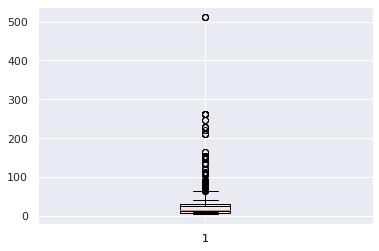

In [67]:
# 시각화해서 봐보기
plt.boxplot(train[train['Pclass']==2].Fare);
plt.boxplot(train['Fare']);

In [68]:
QQ1 = 7.92
QQ3 = 31.27

QQR = QQ3 - QQ1

fare_min = QQ1 - QQR *1.5
fare_max = QQ3 + QQR * 1.5
print(fare_min)
print(fare_max)

-27.105000000000004
66.295


#### Pclass별 평균으로 Fare의 범주 나눠주기

In [69]:
### Pclass와 Fare

print('Fare의 \n', train.Fare.describe())

print('class가 3인 사람들 \n',train[train['Pclass']==3].Fare.mean())
print('class가 2인 사람들 \n',train[train['Pclass']==2].Fare.mean())
print('calss가 1인 사람들 \n',train[train['Pclass']==1].Fare.mean())

Fare의 
 count    891.000000
mean      32.876969
std       49.690083
min        4.012500
25%        7.925000
50%       14.500000
75%       31.275000
max      512.329200
Name: Fare, dtype: float64
class가 3인 사람들 
 13.786996130346234
class가 2인 사람들 
 21.335878804347825
calss가 1인 사람들 
 86.1026041666666


In [70]:
for dataset in train_and_test:
    dataset.loc[dataset['Fare'] <= 13.79, 'Fare'] = 0 
    dataset.loc[(dataset['Fare'] > 13.79) & (dataset['Fare'] <= 21.34), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 21.34) & (dataset['Fare'] <= 86.12), 'Fare'] = 2 
    dataset.loc[(dataset['Fare'] > 86.12), 'Fare'] = 3

In [71]:
train.Fare.value_counts()

0.0    422
2.0    296
1.0    107
3.0     66
Name: Fare, dtype: int64

In [72]:
for dataset in train_and_test:
    dataset['Fare'] = dataset['Fare'].replace(0, 'low')
    dataset['Fare'] = dataset['Fare'].replace(1, 'middle')
    dataset['Fare'] = dataset['Fare'].replace(2, 'heigh')
    dataset['Fare'] = dataset['Fare'].replace(3, 'supper_heigh')

In [73]:
print(train.Fare.value_counts())
test.Fare.value_counts()

low             422
heigh           296
middle          107
supper_heigh     66
Name: Fare, dtype: int64


low             199
heigh           135
middle           50
supper_heigh     34
Name: Fare, dtype: int64

### Age처리

In [74]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,low,S,mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,heigh,C,mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,low,S,miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,heigh,S,mrs
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,low,S,mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,low,S,other
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,heigh,S,miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.85,1,2,W./C. 6607,heigh,S,miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,heigh,C,mr


In [85]:
train['Age'].describe()

count     891.00
unique     93.00
top        32.37
freq      119.00
Name: Age, dtype: float64

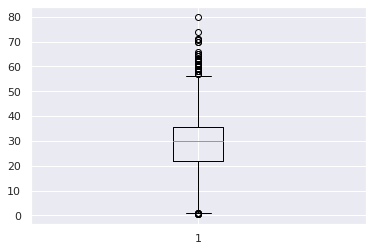

In [86]:
plt.boxplot(train.Age);

### 구간화 해주기

In [87]:
train['AgeBand'] = pd.cut(train['Age'],5)
print(train[['AgeBand','Survived']].groupby(['AgeBand'], as_index=False).mean())    

            AgeBand  Survived
0    (0.34, 16.336]  0.548077
1  (16.336, 32.252]  0.392670
2  (32.252, 48.168]  0.320000
3  (48.168, 64.084]  0.434783
4    (64.084, 80.0]  0.090909


In [89]:
for dataset in train_and_test:
    dataset.loc[dataset['Age']<=16, 'Age'] =0
    dataset.loc[(dataset['Age']>16) & (dataset['Age']<=32), 'Age'] = 1
    dataset.loc[(dataset['Age']>32) & (dataset['Age']<=48), 'Age'] = 2
    dataset.loc[(dataset['Age']>48) & (dataset['Age']<=64), 'Age'] = 3
    dataset.loc[dataset['Age']>64, 'Age'] = 4
    dataset['Age'] = dataset['Age'].map({0:'Child',1:'Yound',2:'Middle',3:'Prime',4:'Old'}).astype(str)


In [90]:
print('train.Age: \n', train.Age.value_counts())
print('test.Age: \n', test.Age.value_counts())

train.Age: 
 Yound     382
Middle    325
Child     104
Prime      69
Old        11
Name: Age, dtype: int64
test.Age: 
 Yound     193
Middle    148
Child      38
Prime      37
Old         2
Name: Age, dtype: int64


## 특성추출 셋준비

In [91]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",male,Yound,1,0,A/5 21171,low,S,mr,"(16.336, 32.252]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Middle,1,0,PC 17599,heigh,C,mrs,"(32.252, 48.168]"
2,3,1,3,"Heikkinen, Miss. Laina",female,Yound,0,0,STON/O2. 3101282,low,S,miss,"(16.336, 32.252]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Middle,1,0,113803,heigh,S,mrs,"(32.252, 48.168]"
4,5,0,3,"Allen, Mr. William Henry",male,Middle,0,0,373450,low,S,mr,"(32.252, 48.168]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,Yound,0,0,211536,low,S,other,"(16.336, 32.252]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,Yound,0,0,112053,heigh,S,miss,"(16.336, 32.252]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,Yound,1,2,W./C. 6607,heigh,S,miss,"(16.336, 32.252]"
889,890,1,1,"Behr, Mr. Karl Howell",male,Yound,0,0,111369,heigh,C,mr,"(16.336, 32.252]"


In [ ]:
features_drop = ['Name','Ticket']

train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)

train = train.drop('PassengerId','AgeBand', axis=1)

print(train.head())
# print(test.head())

In [95]:
train = train.drop('AgeBand', axis=1)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,0,3,male,Yound,1,0,low,S,mr
1,1,1,female,Middle,1,0,heigh,C,mrs
2,1,3,female,Yound,0,0,low,S,miss
3,1,1,female,Middle,1,0,heigh,S,mrs
4,0,3,male,Middle,0,0,low,S,mr
...,...,...,...,...,...,...,...,...,...
886,0,2,male,Yound,0,0,low,S,other
887,1,1,female,Yound,0,0,heigh,S,miss
888,0,3,female,Yound,1,2,heigh,S,miss
889,1,1,male,Yound,0,0,heigh,C,mr


In [96]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,892,3,male,Middle,0,0,low,Q,mr
1,893,3,female,Middle,1,0,low,S,mrs
2,894,2,male,Prime,0,0,low,Q,mr
3,895,3,male,Yound,0,0,low,S,mr
4,896,3,female,Yound,1,1,low,S,mrs
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,Middle,0,0,low,S,mr
414,1306,1,female,Middle,0,0,supper_heigh,C,other
415,1307,3,male,Middle,0,0,low,S,mr
416,1308,3,male,Middle,0,0,low,S,mr


In [97]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

train_label = train['Survived']
train_data = train.drop('Survived', axis=1)
test_data = test.drop('PassengerId', axis=1).copy()

## 모델 설계 학습

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.utils import shuffle

In [103]:
train_data, train_label = shuffle(train_data, train_label, random_state=5)

In [107]:
def train_and_test(model):
    model.fit(train_data, train_label)
    prediction = model.predict(test_data)
    accuracy = round(model.score(train_data, train_label) *100, 2)
    print("Accuracy: ", accuracy, "%")
    return prediction

In [112]:
log_pred = train_and_test(LogisticRegression())
svm_pred = train_and_test(SVC())
knn_pred = train_and_test(KNeighborsClassifier(n_neighbors=4))
rf_pred = train_and_test(RandomForestClassifier(n_estimators=100))
nb_pred = train_and_test(GaussianNB())

Accuracy:  82.83 %
Accuracy:  83.61 %
Accuracy:  83.5 %
Accuracy:  88.44 %
Accuracy:  78.79 %


In [113]:
submission = pd.DataFrame({
    'PassengerId':test['PassengerId'],
    "Survived":rf_pred
})

submission.to_csv('submission_rf.csv', index=False)